In [1]:
import xarray
import matplotlib.pyplot as mp
import cartopy
import numpy
import glob
import gdal
import matplotlib.colors
import geopandas
import shapely
import cmocean
import pandas

In [2]:
#filename = '/Users/baird/Dropbox/_data_observations/CALIPSO/CAL_LID_L2_05kmCPro-Standard-V4-10.2018-05-31T17-55-21ZN.hdf'
file_dir = '/beegfs/DATA/pritchard/blangenb/CALIPSO_DATA/'

In [4]:
#file_list = sorted(glob.glob(file_dir+'/*.hdf'))
file_list = sorted(numpy.load('./borneo_land_mass_intersection_files_ALL.npy'))

In [9]:
# ===== open file, pull out specific data set
gdal_file = gdal.Open(file_list[0])
gdal_subdatasets = gdal_file.GetSubDatasets()
gdal_clf_ds = gdal.Open(gdal_subdatasets[31][0]) # cloud fraction
gdal_tbc_ds = gdal.Open(gdal_subdatasets[35][0]) # total backscatter

In [10]:
gdal_clf_data = gdal_clf_ds.ReadAsArray()
gdal_tbc_data = gdal_tbc_ds.ReadAsArray()

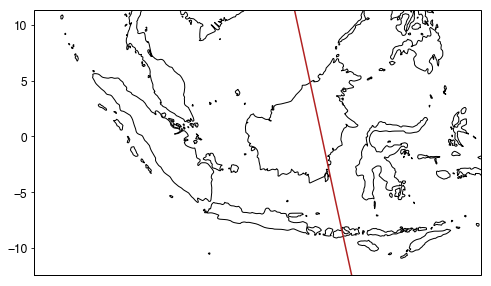

In [13]:
ds = xarray.open_dataset(file_list[0])

lat = ds['Latitude'].isel(fakeDim3=0).values
lon = ds['Longitude'].isel(fakeDim5=0).values


#####
fontsize=12
map_proj = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection=map_proj)
ax.set_extent([90,130,-12,11])
#ax.set_extent([50,180,-70,70])
ax.coastlines(resolution='50m')

ax.plot(lon,lat,c='firebrick')

ax.set_yticks([-10,-5,0,5,10])
ax.tick_params(labelsize=fontsize)

plot multiple at once

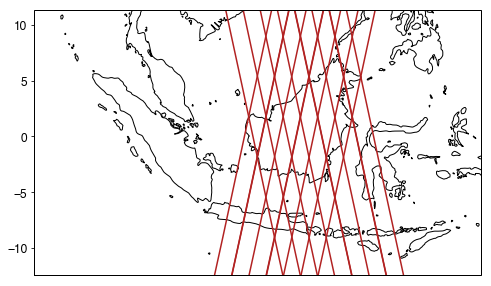

In [18]:
ds = xarray.open_dataset(file_list[0])

#####
fontsize=12
map_proj = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection=map_proj)
ax.set_extent([90,130,-12,11])
#ax.set_extent([50,180,-70,70])
ax.coastlines(resolution='50m')

for file in file_list[:19]:
    ds = xarray.open_dataset(file)
    lat = ds['Latitude'].isel(fakeDim3=0).values
    lon = ds['Longitude'].isel(fakeDim5=0).values
    ax.plot(lon,lat,c='firebrick')
    ds.close()

ax.set_yticks([-10,-5,0,5,10])
ax.tick_params(labelsize=fontsize)

# open states

In [ ]:
states = geopandas.read_file('/beegfs/DATA/pritchard/blangenb/NATURAL_EARTH_DATA/ne_10m_admin_1_states_provinces')
states_indo = states[states['admin']=='Indonesia']

# extract Kalimantan (Indonesian Borneo)
kali_indices = ['Kalimantan' in i for i in states_indo['name']]
states_indo_kalimantan = states_indo[kali_indices]

# also extract Malaysian Borneo
states_malay = states[states['admin']=='Malaysia']
states_malay_borneo = states_malay[[n in ['Sabah','Sarawak'] for n in states_malay['name']]]
states_brunei = states[states['admin']=='Brunei']

borneo_gdf = pandas.concat([states_indo_kalimantan, states_malay_borneo, states_brunei])
borneo_gdf_union = borneo_gdf.geometry.unary_union
borneo_main_geom = borneo_gdf_union.geoms[15]
list(borneo_gdf_union.geoms)[15]

In [ ]:
ds = xarray.open_dataset(file)
lat = ds['Latitude'].isel(fakeDim3=0).values
lon = ds['Longitude'].isel(fakeDim5=0).values

In [18]:
track_geom = shapely.geometry.LineString(zip(lon,lat))

loop through files  
keep track of all that intersect  

In [56]:
track_geom_list = []
file_intersect_list = []

for f in range(200):#file_list.__len__()):
    if f%100==0:
        print(f+1, 'out of '+str(file_list.__len__()))
    #print(file)
    ds = xarray.open_dataset(file_list[f])
    lat = ds['Latitude'].isel(fakeDim3=0).values
    lon = ds['Longitude'].isel(fakeDim5=0).values
    ds.close()
    
    track_geom = shapely.geometry.LineString(zip(lon,lat))
    if track_geom.intersects(borneo_main_geom):
        track_geom_list.append(track_geom_temporary)
        file_intersect_list.append(file)

file_intersect_list = numpy.array(file_intersect_list)
numpy.save('borneo_land_mass_intersections.npy', file_intersect_list)

1 out of 11427
101 out of 11427


In [58]:
import joblib

In [100]:
# define function to search whether the paths intersect

# must already have borneo_main_geom defined

geometry_of_interest = borneo_main_geom
def do_they_intersect(file):
    
    file_intersect_list = []
    track_geom_list = []
    
    #ds = xarray.open_dataset(file_list[f])
    ds = xarray.open_dataset(file)
    lat = ds['Latitude'].isel(fakeDim3=0).values
    lon = ds['Longitude'].isel(fakeDim5=0).values
    ds.close()
    
    track_geom = shapely.geometry.LineString(zip(lon,lat))
    if track_geom.intersects(geometry_of_interest):
        track_geom_list.append(track_geom_temporary)
        file_intersect_list.append(file)    

    return file_intersect_list, track_geom_list

    out = Parallel(n_jobs=2, verbose=100, pre_dispatch='1.5*n_jobs')(
    ...                delayed(sqrt)(i) for i in producer())

    Timing stats (first 50 files)
    n_jobs = 4:  8.4 s
    n_jobs = 8:  15.4 s
    n_jobs = 10:  11.7s

    Timing stats (first 100 files)
    n_jobs = 2:  18.3 s
    n_jobs = 3:  16.9 s
    n_jobs = 4:  16.6 s
    n_jobs = 5:  18.1 s
    n_jobs = 8:  30.8 s
    n_jobs = 10:  27.2 s
    n_jobs = 32:  51.4 s
    n_jbos = 64 (n_jobs=-1):  23.5 s

In [ ]:
joblib_result = joblib.Parallel(n_jobs=4, verbose=10)(joblib.delayed(do_they_intersect)(f) for f in file_list[:100])

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    4.1s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    6.0s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.3s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:    9.2s


In [83]:
import multiprocessing

In [85]:
multiprocessing.cpu_count()

64

In [74]:
joblib_result[0]

['/beegfs/DATA/pritchard/blangenb/CALIPSO_DATA/CAL_LID_L2_05kmCPro-Standard-V4-10.2006-06-13T05-41-22ZD.hdf']

In [32]:
track_geom_ALL = shapely.geometry.MultiLineString(track_geom_list)

In [33]:
track_geom_ALL

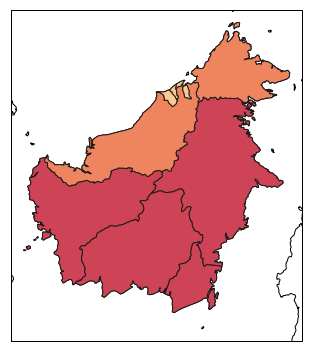

In [34]:
map_proj = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(8.5,5))

ax = fig.add_subplot(111, projection=map_proj)
ax.coastlines(resolution='10m')

ax.add_geometries(states_indo_kalimantan.geometry, crs=map_proj, facecolor=cmocean.cm.matter(0.5), edgecolor='0.1')
ax.add_geometries(states_malay_borneo.geometry, crs=map_proj, facecolor=cmocean.cm.matter(0.3), edgecolor='0.1')
ax.add_geometries(states_brunei.geometry, crs=map_proj, facecolor=cmocean.cm.matter(0.1), edgecolor='0.1')

minx_min = numpy.min(states_indo_kalimantan.geometry.bounds['minx'])
maxx_max = numpy.max(states_malay_borneo.geometry.bounds['maxx'])
miny_min = numpy.min(states_indo_kalimantan.geometry.bounds['miny'])
maxy_max = numpy.max(states_malay_borneo.geometry.bounds['maxy'])

offset = 0.5
ax.set_extent([minx_min-offset,maxx_max+offset,miny_min-offset,maxy_max+offset])

fig.tight_layout()

concatenate all the states plotted above and take their union

(index 15 corresponds to the big Borneo mainland)

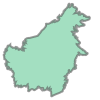

In [36]:
borneo_gdf = pandas.concat([states_indo_kalimantan, states_malay_borneo, states_brunei])
borneo_gdf_union = borneo_gdf.geometry.unary_union
borneo_main_geom = borneo_gdf_union.geoms[15]
list(borneo_gdf_union.geoms)[15]

In [37]:
track_geom_intersections = track_geom_ALL.intersection(borneo_main_geom)

In [39]:
track_geom_TR = track_geom_ALL.intersects(borneo_main_geom)

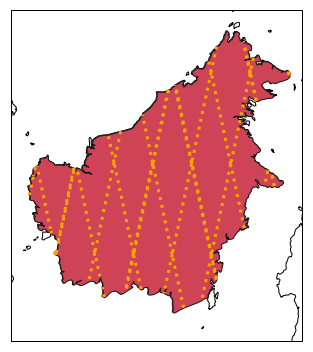

In [38]:
map_proj = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(8.5,5))

ax = fig.add_subplot(111, projection=map_proj)
ax.coastlines(resolution='10m')

ax.add_geometries([borneo_main_geom], crs=map_proj, facecolor=cmocean.cm.matter(0.5), edgecolor='0.1')

minx_min = numpy.min(states_indo_kalimantan.geometry.bounds['minx'])
maxx_max = numpy.max(states_malay_borneo.geometry.bounds['maxx'])
miny_min = numpy.min(states_indo_kalimantan.geometry.bounds['miny'])
maxy_max = numpy.max(states_malay_borneo.geometry.bounds['maxy'])

ax.add_geometries(track_geom_intersections, crs=map_proj, facecolor='None', edgecolor='orange', linewidth=3, linestyle=':')

offset = 0.5
ax.set_extent([minx_min-offset,maxx_max+offset,miny_min-offset,maxy_max+offset])

fig.tight_layout()

In [86]:
type(track_indo_geom)

shapely.geometry.multilinestring.MultiLineString

In [87]:
track_indo_geom.length

7.916642544606901

In [90]:
type(track_geom)

shapely.geometry.linestring.LineString

In [91]:
print(list(track_geom.coords)[:10])

[(138.92745971679688, -65.68175506591797), (138.88674926757812, -65.6396484375), (138.84593200683594, -65.59764099121094), (138.80540466308594, -65.5558090209961), (138.7650909423828, -65.51347351074219), (138.72476196289062, -65.47113037109375), (138.6844940185547, -65.4288330078125), (138.64434814453125, -65.38661193847656), (138.6042022705078, -65.34445190429688), (138.5640106201172, -65.30204010009766)]


In [92]:
track_indo_geom.bounds

(114.70519639651927,
 -2.8824958739188804,
 116.35666331076035,
 4.862155873587055)

In [94]:
list(track_indo_geom.geoms)

In [101]:
list(track_indo_geom.geoms[0].coords)[:10]

[(116.35666331076035, -2.8824958739188804),
 (116.3547134399414, -2.8733270168304443),
 (116.34498596191406, -2.828329563140869),
 (116.33528137207031, -2.783463954925537),
 (116.32574462890625, -2.738548994064331),
 (116.31639099121094, -2.69353985786438),
 (116.30668640136719, -2.648712158203125),
 (116.2981776944089, -2.6088142677515735)]

In [102]:
list(track_indo_geom.geoms[1].coords)[:10]

[(116.29772999427176, -2.606714972157712),
 (116.2970962524414, -2.603743314743042),
 (116.28748321533203, -2.5587339401245117),
 (116.27777862548828, -2.5137205123901367),
 (116.26827239990234, -2.468475580215454),
 (116.25874328613281, -2.423393726348877),
 (116.24913787841797, -2.378446578979492),
 (116.23944091796875, -2.3336126804351807),
 (116.22989654541016, -2.2885940074920654),
 (116.22039031982422, -2.2435803413391113)]

In [119]:
LIST = list(track_indo_geom.geoms[0].coords) + list(track_indo_geom.geoms[1].coords)

In [120]:
mask = [latlon in LIST for latlon in list(zip(lon,lat))]

In [121]:
sum(mask)

173

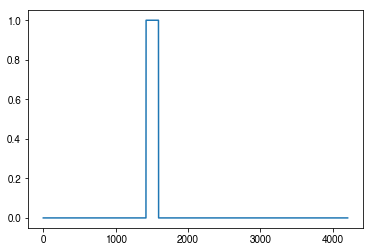

In [122]:
mp.plot(mask)